In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("spain.csv")
data

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
0,Arenas De Getxo,Atletico Madrid,1929-02-10,2,3,F,spain,Arenas De Getxo (Spain),Atletico Madrid (Spain),spain,spain,ES,ES,Europe,Europe,Europe,national
1,Espanyol Barcelona,Real Union,1929-02-10,3,2,F,spain,Espanyol Barcelona (Spain),Real Union (Spain),spain,spain,ES,ES,Europe,Europe,Europe,national
2,Real Madrid,Ce Europa,1929-02-10,5,0,F,spain,Real Madrid (Spain),Ce Europa (Spain),spain,spain,ES,ES,Europe,Europe,Europe,national
3,Real Sociedad,Athletic Bilbao,1929-02-10,1,1,F,spain,Real Sociedad (Spain),Athletic Bilbao (Spain),spain,spain,ES,ES,Europe,Europe,Europe,national
4,Racing Santander,FC Barcelona,1929-02-12,0,2,F,spain,Racing Santander (Spain),FC Barcelona (Spain),spain,spain,ES,ES,Europe,Europe,Europe,national
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25050,Cd Alaves,Girona FC,2019-05-18,2,1,F,spain,Cd Alaves (Spain),Girona FC (Spain),spain,spain,ES,ES,Europe,Europe,Europe,national
25051,Celta Vigo,Rayo Vallecano,2019-05-18,2,2,F,spain,Celta Vigo (Spain),Rayo Vallecano (Spain),spain,spain,ES,ES,Europe,Europe,Europe,national
25052,SD Huesca,CD Leganes,2019-05-18,2,1,F,spain,SD Huesca (Spain),CD Leganes (Spain),spain,spain,ES,ES,Europe,Europe,Europe,national
25053,Real Madrid,Real Betis,2019-05-19,0,2,F,spain,Real Madrid (Spain),Real Betis (Spain),spain,spain,ES,ES,Europe,Europe,Europe,national


In [3]:
data.describe()

,gh,ga
count,25055.000000,25055.000000
mean,1.820714,1.035482
std,1.497272,1.085134
min,0.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,1.000000
75%,3.000000,2.000000
max,12.000000,8.000000


In [4]:
data[data['gh'] == 12]

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
225,Athletic Bilbao,FC Barcelona,1931-02-08,12,1,F,spain,Athletic Bilbao (Spain),FC Barcelona (Spain),spain,spain,ES,ES,Europe,Europe,Europe,national


In [5]:
data[data['ga'] == 8]

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
4759,CA Osasuna,Athletic Bilbao,1959-01-11,1,8,F,spain,CA Osasuna (Spain),Athletic Bilbao (Spain),spain,spain,ES,ES,Europe,Europe,Europe,national
4920,Ud Las Palmas,FC Barcelona,1959-10-25,0,8,F,spain,Ud Las Palmas (Spain),FC Barcelona (Spain),spain,spain,ES,ES,Europe,Europe,Europe,national
15768,Albacete,Deportivo La Coruna,1995-06-18,2,8,F,spain,Albacete (Spain),Deportivo La Coruna (Spain),spain,spain,ES,ES,Europe,Europe,Europe,national
16219,Real Oviedo,Real Valladolid,1996-05-19,3,8,F,spain,Real Oviedo (Spain),Real Valladolid (Spain),spain,spain,ES,ES,Europe,Europe,Europe,national
21746,Ud Almeria,FC Barcelona,2010-11-20,0,8,F,spain,Ud Almeria (Spain),FC Barcelona (Spain),spain,spain,ES,ES,Europe,Europe,Europe,national
23186,Deportivo La Coruna,Real Madrid,2014-09-20,2,8,F,spain,Deportivo La Coruna (Spain),Real Madrid (Spain),spain,spain,ES,ES,Europe,Europe,Europe,national
23496,Cordoba CF,FC Barcelona,2015-05-02,0,8,F,spain,Cordoba CF (Spain),FC Barcelona (Spain),spain,spain,ES,ES,Europe,Europe,Europe,national
23867,Deportivo La Coruna,FC Barcelona,2016-04-20,0,8,F,spain,Deportivo La Coruna (Spain),FC Barcelona (Spain),spain,spain,ES,ES,Europe,Europe,Europe,national


In [6]:
home = data[(data['gh'] > data['ga'])]

home = home['home'].value_counts().rename_axis('Team').reset_index(name='points')

home["points"] = 3 * home["points"]

away = data[(data['ga'] > data['gh'])]

away = away['away'].value_counts().rename_axis('Team').reset_index(name='points')

away["points"] = 3 * away["points"]

drawdata = data[(data['ga'] == data['gh'])]

draw = drawdata[['home','away']].stack().value_counts().rename_axis('Team').reset_index(name='points')

home1 = home[home.Team != 'Glossop North End'].sort_values(by='Team', ascending=True).reset_index()

draw1 = draw[draw.Team != 'Glossop North End'].sort_values(by='Team', ascending=True).reset_index()

away1 = away.sort_values('Team').reset_index()

total = draw1['points'] + home1['points'] + away1['points']

aggregate = total.rename_axis('Team').reset_index(name='points')

aggregate['Team'] = home1['Team']

aggregate.sort_values(by='points', ascending = False).head(10)

,Team,points
42,Real Madrid,5637.0
26,FC Barcelona,5483.0
4,Atletico Madrid,4476.0
3,Athletic Bilbao,4356.0
53,Sevilla FC,3618.0
25,Espanyol Barcelona,3554.0
59,Valencia CF,3549.0
45,Real Sociedad,3268.0
48,Real Zaragoza,2616.0
40,Real Betis,2368.0


<AxesSubplot:xlabel='Team'>

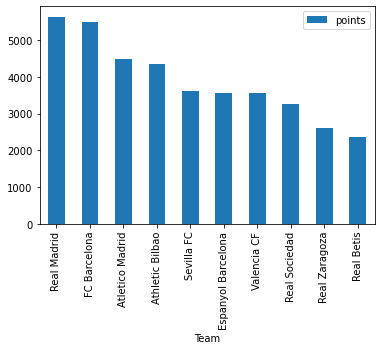

In [7]:
aggregate.sort_values(by='points', ascending = False).head(10).plot.bar(x='Team')

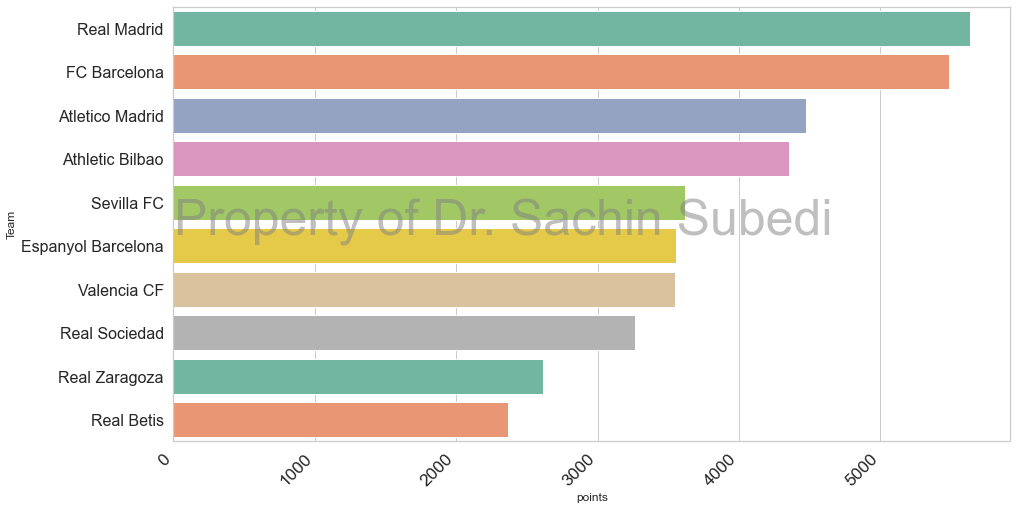

In [8]:
top = aggregate.sort_values(by='points', ascending = False).head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(15,8))

sns.barplot(data = top, x = 'points', y = 'Team', palette='Set2')

plt.xticks(

    rotation=45,

    horizontalalignment='right',

    fontweight='light',

    fontsize='x-large' 

)

plt.yticks(

    fontweight='light',

    fontsize='16' 

)

plt.text(3, 5, 'Property of Dr. Sachin Subedi',

         fontsize=50, color='gray',

       va='bottom', alpha=0.5)

plt.show()



In [9]:
data[['home','away']].stack().value_counts().rename_axis('Team').reset_index(name='counts')

,Team,counts
0,FC Barcelona,2838
1,Real Madrid,2838
2,Athletic Bilbao,2838
3,Valencia CF,2740
4,Espanyol Barcelona,2702
...,...,...
57,Xerez Cd,38
58,CD Condal,30
59,Atletico Tetuan,30
60,CD Leonesa,30
